In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
import matplotlib.pyplot as plt

In [ ]:
#front
side_fan = (113,280)

In [89]:
df = {}
wind_speed = 3
parent_folder = f"dataset/column/hover/wind_speed_{wind_speed}/tail_wind/"
def create_df():
    for i in range(1,6):
        csv_path = f"{parent_folder}drone{i}.csv"
        df[csv_path] = pd.read_csv(csv_path)
def calculate_global():
    for i in range(1,6):
        csv_path = f"{parent_folder}drone{i}.csv"
        df[csv_path] = pd.read_csv(csv_path)
        
        pad_coor = {}
        # front
        pad_coor['1,1'] = (0,200)
        pad_coor['1,5'] = (300,200)
        pad_coor['2'] = (0,150)
        pad_coor['6'] = (300,150)
        pad_coor['3'] = (0,100)
        pad_coor['7'] = (300,100)
        pad_coor['4'] = (0,50)
        pad_coor['8'] = (300,50)
        pad_coor['5,1'] = (0,0)
        pad_coor['5,5'] = (300,0)
        
        # declare
        df[csv_path]['global_x'] = 1
        df[csv_path]['global_y'] = 1
        
        # calculate global and plot
        for row_no in range(len(df[csv_path])):
            pad_id = df[csv_path]['mid'][row_no]
            rel_x = df[csv_path]['x'][row_no]
            rel_y = df[csv_path]['y'][row_no]
            drone_number = df[csv_path]['address'][row_no][-1]
            if pad_id > 0:
                if pad_id == 1 or pad_id == 5:
                    num = 1 if int(drone_number) < 3 else 5
                    pad_coordinate = pad_coor[f"{num},{pad_id}"]
                else:
                    pad_coordinate = pad_coor[f"{pad_id}"]
                
                global_x = pad_coordinate[0] + rel_x
                global_y = pad_coordinate[1] + rel_y
            else:
                global_x = None
                global_y = None
        
            df[csv_path].at[row_no,"global_x"] = global_x
            df[csv_path].at[row_no,"global_y"] = global_y

In [76]:

import matplotlib.dates as md

def plot_attribute(x_attr, y_attr):
    # if x_attr == "timestamp":
    #     xfmt = md.DateFormatter('%H:%M:%S')    
    for i in range(1,6):
        csv_path = f"{parent_folder}drone{i}.csv" 
        plt.plot(df[csv_path][x_attr],df[csv_path][y_attr])
        plt.xlabel(x_attr)
        plt.ylabel(y_attr)
    plt.legend([f"drone{i}" for i in range(1,6)])
    # plt.savefig(f'Visualization/{y_attr}_headwind.png', facecolor='white', edgecolor='black')
    plt.show()    

In [6]:
## speed 1: 5.4, speed 3: 8, speed 5: 12.5
speed_settings_to_kph = {
    0: 0,
    1: 5.4,
    3: 8,
    5: 12.5
}
def add_wind_speed():
    for key in df:
        df[key]['wind_speed_kph'] = speed_settings_to_kph[wind_speed] 

In [90]:
create_df()

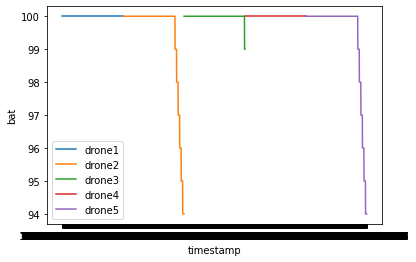

In [67]:
# mid,x,y,z,mpry,pitch,roll,yaw,vgx,vgy,vgz,templ,temph,tof,h,bat,baro,time,agx,agy,agz,timestamp,address
# plot_attribute('global_x','global_y')
# plot_attribute('timestamp','mpry')
# plot_attribute('timestamp','pitch')
# plot_attribute('timestamp','roll')
# plot_attribute('timestamp','yaw')
# plot_attribute('timestamp','vgx')
# plot_attribute('timestamp','vgy')
# plot_attribute('timestamp','vgz')
# plot_attribute('timestamp','templ')
# plot_attribute('timestamp','temph')
# plot_attribute('timestamp','tof')
# plot_attribute('timestamp','h')
plot_attribute('timestamp','bat')
# plot_attribute('timestamp','baro')
# plot_attribute('timestamp','time')
# plot_attribute('timestamp','agx')
# plot_attribute('timestamp','agy')
# plot_attribute('timestamp','agz')


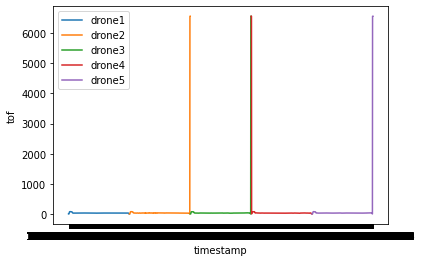

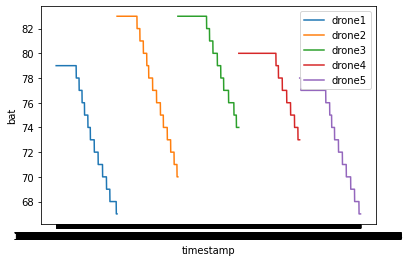

In [92]:
# mid,x,y,z,mpry,pitch,roll,yaw,vgx,vgy,vgz,templ,temph,tof,h,bat,baro,time,agx,agy,agz,timestamp,address
# plot_attribute('global_x','global_y')
# plot_attribute('timestamp','mpry')
# plot_attribute('timestamp','pitch')
# plot_attribute('timestamp','roll')
# plot_attribute('timestamp','yaw')
# plot_attribute('timestamp','vgx')
# plot_attribute('timestamp','vgy')
# plot_attribute('timestamp','vgz')
# plot_attribute('timestamp','agx')
# plot_attribute('timestamp','agy')
# plot_attribute('timestamp','agz')
# plot_attribute('timestamp','templ')
# plot_attribute('timestamp','temph')
plot_attribute('timestamp','tof')
# plot_attribute('timestamp','h')
plot_attribute('timestamp','bat')
# plot_attribute('timestamp','baro')
# plot_attribute('timestamp','time')



dataset/front/forward/wind_speed_0/none/


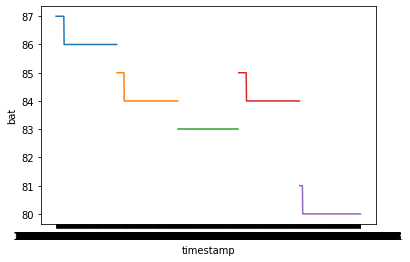

dataset/front/forward/wind_speed_1/head_wind/


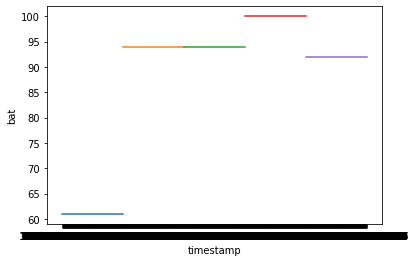

dataset/front/forward/wind_speed_2/head_wind/


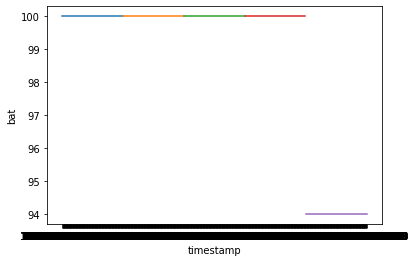

In [21]:
for speed in range(3):
    if speed == 0:
        dir = 'none'
    else:
        dir = 'head_wind'
    parent_folder = f"dataset/front/forward/wind_speed_{speed}/{dir}/"
    print(parent_folder)
    calculate_global()
    plot_attribute('timestamp','bat')



In [102]:
for path in df.keys():
    new_path = path.split('.')[0] + "_with_global.csv"
    df[path].to_csv(new_path,index=False)

In [ ]:
# Idea
# check which voltage is more sensitive
# try to decrease speed
# try to put more fan
# try to make longer trip

# result
# no wind 10 cm/s full range -> battery drop down by 1 percentage
# windspeed 2 -> battery drop by 0 percent
# windspeed 3 -> battery drop by 7 percent
# windspeed 4 -> moving away from fan

# speed = 20
# windspeed 0 -> dropping by 2 percent/ not dropping
# windspeed 1 -> dropping by 1 percent
# windspeed 2 -> dropping by 2 percent
# windspeed 3 -> flying away a little bit, dropping by 4/2 percent
# windspeed 4 -> drop by 4/3
# windspeed 5 -> drop by 3/2/4
# 6 -> fail can not move forward/ flying away from 6/ go down by 3 percent

# speed 25
# windspeed 6 -> drop by 1 percent

# speed = 30
# windspeed 6 -> fly away from fan

# speed = 40

# windspeed 7
# speed = 100 not changing battery
# speed = 50 not changing battery
# speed = 25 not changing battery

# windspeed 8
# even speed = 100 still fly away.